# Camada linear

Um dos principais blocos do PyTorch utilizado na construção de redes neurais é a camada linear, essa camada é utilizada para a construção de um modelo de redes neurais chamado *fully connected*, que são camadas de neuronios onde todos se conectam com todos.

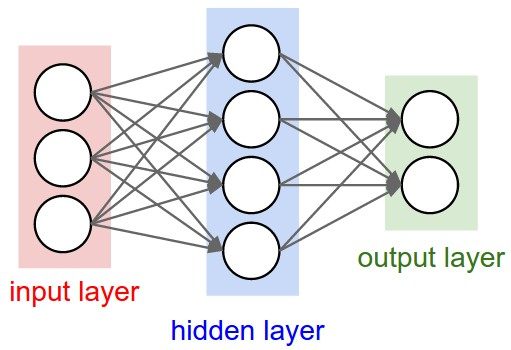

A operação matemática realizada pela camada linear pode ser descrita através da seguinte expressão matemática.

In [22]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [23]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[20:40]
diabetes_y_train = diabetes.target[20:40]

Nessa parte foi feito apenas o slice dos dados no numpy, esses dados serão utilizados no treinamento.

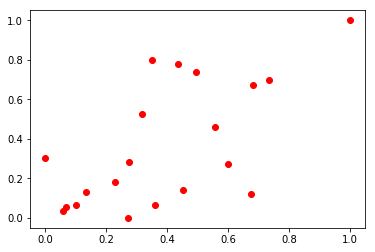

In [24]:
diabetes_X_train -= diabetes_X_train.min()
diabetes_X_train /= diabetes_X_train.max()
diabetes_y_train -= diabetes_y_train.min()
diabetes_y_train /= diabetes_y_train.max()
plt.plot(diabetes_X_train, diabetes_y_train, 'ro', label='Train data')
plt.show()

In [25]:
class LinearRegressionModel(torch.nn.Module): 
  
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)  # One in and one out 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 
  
# our model 
model = LinearRegressionModel()

In [26]:
x_data = torch.FloatTensor(diabetes_X_train)
y_data = torch.FloatTensor(diabetes_y_train)
y_data = y_data.view(diabetes_X_train.shape)

In [28]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 

loss_vec = []

for epoch in range(5000): 
    inputs = Variable(x_data)
    target = Variable(y_data)
    
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = model(inputs) 
  
    # Compute and print loss 
    loss = criterion(pred_y, target) 
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    loss_vec.append(loss.item())
    print('epoch {}, loss {}'.format(epoch, loss.item())) 

epoch 0, loss 0.3633134663105011
epoch 1, loss 0.3502175509929657
epoch 2, loss 0.3377206027507782
epoch 3, loss 0.32579511404037476
epoch 4, loss 0.3144148886203766
epoch 5, loss 0.30355486273765564
epoch 6, loss 0.293191134929657
epoch 7, loss 0.2833009660243988
epoch 8, loss 0.2738626003265381
epoch 9, loss 0.264855295419693
epoch 10, loss 0.2562592625617981
epoch 11, loss 0.24805563688278198
epoch 12, loss 0.2402263730764389
epoch 13, loss 0.23275433480739594
epoch 14, loss 0.22562308609485626
epoch 15, loss 0.21881699562072754
epoch 16, loss 0.21232111752033234
epoch 17, loss 0.20612125098705292
epoch 18, loss 0.2002038061618805
epoch 19, loss 0.19455578923225403
epoch 20, loss 0.18916484713554382
epoch 21, loss 0.18401919305324554
epoch 22, loss 0.17910756170749664
epoch 23, loss 0.17441920936107635
epoch 24, loss 0.1699438989162445
epoch 25, loss 0.16567184031009674
epoch 26, loss 0.1615937203168869
epoch 27, loss 0.15770061314105988
epoch 28, loss 0.15398405492305756
epoch 29, 

epoch 645, loss 0.06102394685149193
epoch 646, loss 0.061011526733636856
epoch 647, loss 0.06099913269281387
epoch 648, loss 0.06098677217960358
epoch 649, loss 0.06097443774342537
epoch 650, loss 0.06096212938427925
epoch 651, loss 0.06094985082745552
epoch 652, loss 0.06093759834766388
epoch 653, loss 0.060925379395484924
epoch 654, loss 0.06091318279504776
epoch 655, loss 0.060901012271642685
epoch 656, loss 0.060888875275850296
epoch 657, loss 0.0608767606317997
epoch 658, loss 0.060864679515361786
epoch 659, loss 0.060852620750665665
epoch 660, loss 0.06084059178829193
epoch 661, loss 0.06082858890295029
epoch 662, loss 0.06081661209464073
epoch 663, loss 0.060804665088653564
epoch 664, loss 0.060792744159698486
epoch 665, loss 0.0607808493077755
epoch 666, loss 0.060768984258174896
epoch 667, loss 0.060757145285606384
epoch 668, loss 0.06074533239006996
epoch 669, loss 0.06073354557156563
epoch 670, loss 0.060721784830093384
epoch 671, loss 0.06071005389094353
epoch 672, loss 0.0

epoch 1355, loss 0.05664719641208649
epoch 1356, loss 0.05664472654461861
epoch 1357, loss 0.05664226785302162
epoch 1358, loss 0.05663980916142464
epoch 1359, loss 0.05663736164569855
epoch 1360, loss 0.056634917855262756
epoch 1361, loss 0.05663248151540756
epoch 1362, loss 0.05663004517555237
epoch 1363, loss 0.05662762001156807
epoch 1364, loss 0.05662519857287407
epoch 1365, loss 0.05662278085947037
epoch 1366, loss 0.056620366871356964
epoch 1367, loss 0.05661796033382416
epoch 1368, loss 0.05661556497216225
epoch 1369, loss 0.056613169610500336
epoch 1370, loss 0.05661077797412872
epoch 1371, loss 0.05660839378833771
epoch 1372, loss 0.05660601332783699
epoch 1373, loss 0.05660364031791687
epoch 1374, loss 0.05660127475857735
epoch 1375, loss 0.05659891292452812
epoch 1376, loss 0.0565965510904789
epoch 1377, loss 0.056594204157590866
epoch 1378, loss 0.056591857224702835
epoch 1379, loss 0.0565895177423954
epoch 1380, loss 0.056587181985378265
epoch 1381, loss 0.056584853678941

epoch 2123, loss 0.05575123801827431
epoch 2124, loss 0.055750809609889984
epoch 2125, loss 0.05575037747621536
epoch 2126, loss 0.055749956518411636
epoch 2127, loss 0.05574952811002731
epoch 2128, loss 0.05574909970164299
epoch 2129, loss 0.055748678743839264
epoch 2130, loss 0.05574825406074524
epoch 2131, loss 0.05574783310294151
epoch 2132, loss 0.05574741214513779
epoch 2133, loss 0.05574698746204376
epoch 2134, loss 0.055746570229530334
epoch 2135, loss 0.05574614927172661
epoch 2136, loss 0.05574573203921318
epoch 2137, loss 0.05574531480669975
epoch 2138, loss 0.055744901299476624
epoch 2139, loss 0.055744487792253494
epoch 2140, loss 0.055744070559740067
epoch 2141, loss 0.05574365705251694
epoch 2142, loss 0.055743247270584106
epoch 2143, loss 0.055742837488651276
epoch 2144, loss 0.055742427706718445
epoch 2145, loss 0.055742017924785614
epoch 2146, loss 0.05574160814285278
epoch 2147, loss 0.05574119836091995
epoch 2148, loss 0.05574079602956772
epoch 2149, loss 0.05574038

epoch 2928, loss 0.05559264495968819
epoch 2929, loss 0.055592574179172516
epoch 2930, loss 0.055592503398656845
epoch 2931, loss 0.05559244006872177
epoch 2932, loss 0.0555923655629158
epoch 2933, loss 0.05559230223298073
epoch 2934, loss 0.05559223145246506
epoch 2935, loss 0.055592164397239685
epoch 2936, loss 0.05559210106730461
epoch 2937, loss 0.05559203028678894
epoch 2938, loss 0.05559196323156357
epoch 2939, loss 0.0555918924510479
epoch 2940, loss 0.055591825395822525
epoch 2941, loss 0.05559175834059715
epoch 2942, loss 0.05559169128537178
epoch 2943, loss 0.05559162423014641
epoch 2944, loss 0.055591560900211334
epoch 2945, loss 0.05559149384498596
epoch 2946, loss 0.05559143051505089
epoch 2947, loss 0.055591363459825516
epoch 2948, loss 0.05559129640460014
epoch 2949, loss 0.05559123307466507
epoch 2950, loss 0.0555911660194397
epoch 2951, loss 0.05559110268950462
epoch 2952, loss 0.05559103563427925
epoch 2953, loss 0.05559096857905388
epoch 2954, loss 0.0555909052491188

epoch 3710, loss 0.05556752532720566
epoch 3711, loss 0.05556751415133476
epoch 3712, loss 0.055567506700754166
epoch 3713, loss 0.05556749552488327
epoch 3714, loss 0.055567480623722076
epoch 3715, loss 0.05556746944785118
epoch 3716, loss 0.055567458271980286
epoch 3717, loss 0.05556744709610939
epoch 3718, loss 0.055567435920238495
epoch 3719, loss 0.0555674247443676
epoch 3720, loss 0.055567409843206406
epoch 3721, loss 0.05556740239262581
epoch 3722, loss 0.055567387491464615
epoch 3723, loss 0.05556738004088402
epoch 3724, loss 0.05556736886501312
epoch 3725, loss 0.05556735396385193
epoch 3726, loss 0.05556734278798103
epoch 3727, loss 0.055567335337400436
epoch 3728, loss 0.05556732416152954
epoch 3729, loss 0.055567312985658646
epoch 3730, loss 0.05556730180978775
epoch 3731, loss 0.055567290633916855
epoch 3732, loss 0.05556727573275566
epoch 3733, loss 0.055567264556884766
epoch 3734, loss 0.05556725710630417
epoch 3735, loss 0.05556724593043327
epoch 3736, loss 0.0555672310

epoch 4425, loss 0.055563438683748245
epoch 4426, loss 0.05556343123316765
epoch 4427, loss 0.05556343123316765
epoch 4428, loss 0.05556343123316765
epoch 4429, loss 0.05556342750787735
epoch 4430, loss 0.05556342378258705
epoch 4431, loss 0.05556342378258705
epoch 4432, loss 0.05556342005729675
epoch 4433, loss 0.055563416332006454
epoch 4434, loss 0.055563416332006454
epoch 4435, loss 0.055563412606716156
epoch 4436, loss 0.05556340888142586
epoch 4437, loss 0.05556340888142586
epoch 4438, loss 0.05556340888142586
epoch 4439, loss 0.05556340515613556
epoch 4440, loss 0.05556339770555496
epoch 4441, loss 0.05556340143084526
epoch 4442, loss 0.05556339770555496
epoch 4443, loss 0.055563393980264664
epoch 4444, loss 0.055563393980264664
epoch 4445, loss 0.055563390254974365
epoch 4446, loss 0.05556338652968407
epoch 4447, loss 0.05556338652968407
epoch 4448, loss 0.05556338652968407
epoch 4449, loss 0.05556338280439377
epoch 4450, loss 0.05556337907910347
epoch 4451, loss 0.055563375353

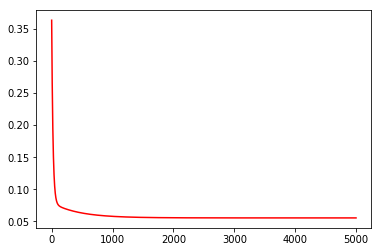

In [29]:
plt.plot(range(5000), loss_vec, 'r-', label='Train data')
plt.show()

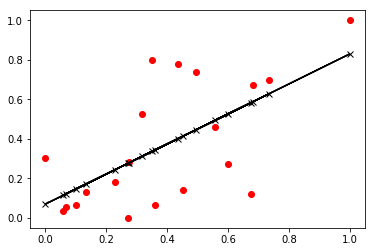

In [30]:
y_pred = model(Variable(x_data))
plt.plot(diabetes_X_train, diabetes_y_train, 'ro', label='Original data')
plt.plot(diabetes_X_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()